## **SML FINAL PROJECT: CNN ON FASHION MNIST**
### Author - Pranav Ramesh Bidare
---
This file contains the implementation of 2 layer CNN on Fashion MNIST Dataset.
All the cells in the file must be executed in the same order for the code to run without any errors. When training the CNN using the best parameters we have to feed in the best hyperparameters in the k-fold validation stage and to get the model summary.


Installing and importing all necessary packages.

In [ ]:
!pip install scikeras

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

import keras
from keras import layers
from keras import models
from keras import utils
from keras.layers import Activation
from keras.regularizers import l2
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History
from keras import losses

from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers  import KerasClassifier

import seaborn as sns

import matplotlib.pyplot as plt

import pandas  as pd

import numpy as np

In [ ]:
# fix random seed for reproducibility
np.random.seed(5)

Preprocessing the Fashion MNIST dataset. We are converting the class labels into one hot encoding.

In [ ]:
def load_and_preprocess_data():
    # Load the Fashion MNIST dataset
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

    # Preprocess the data
    train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
    test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255
    train_labels = to_categorical(train_labels)
    test_labels = to_categorical(test_labels)

    return train_images, train_labels, test_images, test_labels

In [ ]:
train_images, train_labels, test_images, test_labels = load_and_preprocess_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape, train_labels.shape

((60000, 28, 28, 1), (60000, 10))

In [ ]:
test_images.shape, test_labels.shape

((10000, 28, 28, 1), (10000, 10))

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


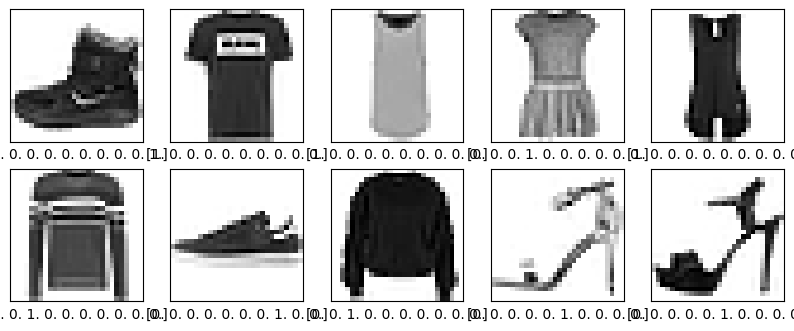

In [ ]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

In [ ]:
print(f'We have {train_images.shape[0]} train samples')
print(f'We have {test_images.shape[0]} test samples')

We have 60000 train samples
We have 10000 test samples


In [ ]:
def create_model(filters, optimizer):
    model = Sequential()
    model.add(layers.Conv2D(filters, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(filters * 2, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer,loss='categorical_crossentropy', metrics=['accuracy'])
    return model




Finding the best hyperparameters using GridSearchCV.

In [ ]:

learning_rate = 0.01
sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.8, nesterov=False)
adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model_init_batch_epoch_CV = KerasClassifier(model = create_model, verbose=1, filters = [32, 64])

# grid search for batch size and number of epochs
param_grid = {'epochs': [10, 20],
              'batch_size': [128, 256],
              'model__filters': [32, 64],
              'model__optimizer': ['sgd', 'adam']}


grid = GridSearchCV(estimator=model_init_batch_epoch_CV,
                  param_grid=param_grid,
                  cv=5,
                  return_train_score=True)




In [ ]:
grid_result = grid.fit(train_images, train_labels)

Epoch 1/10
375/375 [==============================] - 17s 6ms/step - loss: 1.6136 - accuracy: 0.4564
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.8774 - accuracy: 0.6751
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 0.7511 - accuracy: 0.7200
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 0.6826 - accuracy: 0.7443
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: 0.6351 - accuracy: 0.7621
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.5979 - accuracy: 0.7750
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 0.5697 - accuracy: 0.7892
Epoch 8/10
375/375 [==============================] - 2s 6ms/step - loss: 0.5448 - accuracy: 0.7971
Epoch 9/10
375/375 [==============================] - 2s 4ms/step - loss: 0.5266 - accuracy: 0.8071
Epoch 10/10
375/375 [==============================] - 2s 5ms/step
Epoch 1/10
375/375 [===========

Accuracy for the best model and the accuracies for all the other combinations of hyperparameters.

In [ ]:
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.9194 using {'batch_size': 128, 'epochs': 20, 'model__filters': 64, 'model__optimizer': 'adam'}
mean=0.8186, std=0.007174 using {'batch_size': 128, 'epochs': 10, 'model__filters': 32, 'model__optimizer': 'sgd'}
mean=0.9119, std=0.002271 using {'batch_size': 128, 'epochs': 10, 'model__filters': 32, 'model__optimizer': 'adam'}
mean=0.8261, std=0.00754 using {'batch_size': 128, 'epochs': 10, 'model__filters': 64, 'model__optimizer': 'sgd'}
mean=0.9158, std=0.001669 using {'batch_size': 128, 'epochs': 10, 'model__filters': 64, 'model__optimizer': 'adam'}
mean=0.8529, std=0.006545 using {'batch_size': 128, 'epochs': 20, 'model__filters': 32, 'model__optimizer': 'sgd'}
mean=0.9121, std=0.002564 using {'batch_size': 128, 'epochs': 20, 'model__filters': 32, 'model__optimizer': 'adam'}
mean=0.8572, std=0.0033 using {'batch_size': 128, 'epochs': 20, 'model__filters': 64, 'model__optimizer': 'sgd'}
mean=0.9194, std=0.001002 using {'batch_size': 128, 'epochs': 20, 'model__filter

Confusion Matrix for the best model got using GridSearchCV

79/79 [==============================] - 0s 3ms/step
[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 7, 7, 5, 1, 6, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 6, 7, 6, 7, 2, 1, 2, 6, 4, 4, 5, 8, 2, 2, 8, 6, 8, 0, 7, 7, 8, 5, 1, 1, 6, 4, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 6, 5, 3, 6, 7, 1, 8, 0, 1, 4, 2, 3, 6, 7, 6, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8, 0, 0, 9, 9, 3, 0, 8, 4, 1, 5, 4, 1, 9, 1, 8, 4, 2, 1, 2, 5, 1, 6, 0, 0, 1, 6, 1, 3, 2, 2, 3, 4, 1, 4, 5, 2, 4, 7, 9, 3, 7, 2, 3, 9, 0, 9, 4, 7, 4, 2, 0, 5, 2, 1, 2, 1, 3, 0, 9, 1, 0, 9, 3, 6, 7, 9, 9, 4, 4, 7, 1, 2, 1, 4, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3, 1, 6, 7, 2, 8, 5, 2, 0, 7, 7, 6, 2, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 4, 5, 6, 9, 2, 2, 8, 6, 2, 6, 2, 9, 7, 6, 5, 5, 2, 8, 5, 2, 3, 0, 4, 8, 0, 0, 6, 3, 8, 9, 6, 1, 6, 0, 2, 3, 0, 8, 3, 7, 4, 0, 1, 6, 3, 0, 2, 6, 7, 5, 4, 5, 9, 5, 6, 5, 5, 1, 9, 8, 8, 3, 3, 6, 8, 0, 0, 2, 9, 7, 7, 1, 3, 6, 4, 2, 4

<Axes: >

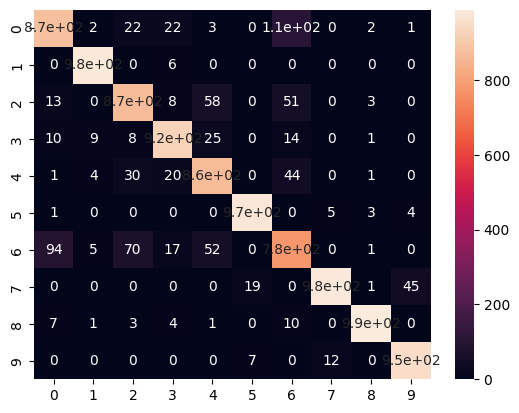

In [ ]:
def getIDX(arr):
  for i in range(len(arr)):
    if arr[i] == 1:
      return i


best_model =grid_result.best_estimator_

# Predicting the Test set results
y_pred = best_model.predict(test_images)

# Making the Confusion Matrix

test_labels = np.round(test_labels).astype(int)
y_pred_without_one_hot = list(map(lambda x : getIDX(x), y_pred))
test_labels_without_one_hot = list(map(lambda x : getIDX(x), test_labels))


print(y_pred_without_one_hot)
print(test_labels_without_one_hot)
cm = confusion_matrix(y_pred_without_one_hot, test_labels_without_one_hot)
sns.heatmap(cm, annot=True)


2 Layer CNN Model

In [ ]:
def create_model(num_filters, kernel_size, dropout_rate):
    model = Sequential([
        Conv2D(num_filters, (kernel_size, kernel_size), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(num_filters * 2, (kernel_size, kernel_size), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')
    ])
    return model
model = create_model(64, 3, 0.2)
epochs = 20
learning_rate = 0.01
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 3200)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

Run this cell to perform k-fold CV on the model. We have to key in the best hyperparameter values in the model = create_model() function.

Epoch 1/50
375/375 [==============================] - 8s 13ms/step - loss: 0.5276 - accuracy: 0.8065 - val_loss: 0.3507 - val_accuracy: 0.8705
Epoch 2/50
375/375 [==============================] - 3s 7ms/step - loss: 0.3607 - accuracy: 0.8670 - val_loss: 0.3009 - val_accuracy: 0.8907
Epoch 3/50
375/375 [==============================] - 3s 7ms/step - loss: 0.3283 - accuracy: 0.8771 - val_loss: 0.3120 - val_accuracy: 0.8831
Epoch 4/50
375/375 [==============================] - 3s 7ms/step - loss: 0.3062 - accuracy: 0.8851 - val_loss: 0.2923 - val_accuracy: 0.8901
Epoch 5/50
375/375 [==============================] - 3s 9ms/step - loss: 0.2925 - accuracy: 0.8896 - val_loss: 0.3202 - val_accuracy: 0.8835
Epoch 6/50
375/375 [==============================] - 3s 7ms/step - loss: 0.2853 - accuracy: 0.8921 - val_loss: 0.2936 - val_accuracy: 0.8944
Epoch 7/50
375/375 [==============================] - 3s 7ms/step - loss: 0.2751 - accuracy: 0.8965 - val_loss: 0.3066 - val_accuracy: 0.8907
Epoch

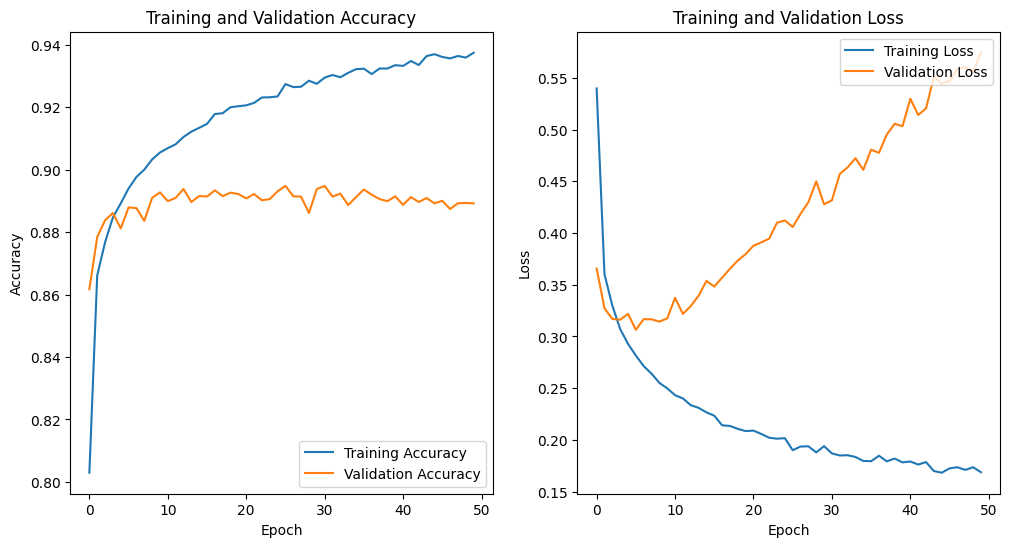

In [ ]:
# Initialize lists to store the history
acc_per_fold = []
loss_per_fold = []
val_acc_per_fold = []
val_loss_per_fold = []

# K-fold Cross Validation model evaluation
fold_no = 1
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True)
epochs = 50
for train, val in kfold.split(train_images, train_labels):
    # Create a new instance of the model
    model = create_model(64, 3, 0.2)
    learning_rate = 0.01
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    # Compile the model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Fit data to model
    history = model.fit(train_images[train], train_labels[train],
                        batch_size=128,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(train_images[val], train_labels[val]))

    # Append history
    acc_per_fold.append(history.history['accuracy'])
    loss_per_fold.append(history.history['loss'])
    val_acc_per_fold.append(history.history['val_accuracy'])
    val_loss_per_fold.append(history.history['val_loss'])

    # Increase fold number
    fold_no += 1

# Convert lists to numpy array for averaging
acc_per_fold = np.array(acc_per_fold)
loss_per_fold = np.array(loss_per_fold)
val_acc_per_fold = np.array(val_acc_per_fold)
val_loss_per_fold = np.array(val_loss_per_fold)

# Calculate average and standard deviation across folds
mean_acc = np.mean(acc_per_fold, axis=0)
mean_loss = np.mean(loss_per_fold, axis=0)
mean_val_acc = np.mean(val_acc_per_fold, axis=0)
mean_val_loss = np.mean(val_loss_per_fold, axis=0)

epochs_range = range(epochs)

# Plot training & validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, mean_acc, label='Training Accuracy')
plt.plot(epochs_range, mean_val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, mean_loss, label='Training Loss')
plt.plot(epochs_range, mean_val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Save the figures
plt.savefig('training_validation_accuracy_loss.png')

plt.show()


Confusion matrix and accuracy for the model trained above.

313/313 [==============================] - 1s 3ms/step
[[787   0  16  11   1   1 182   0   2   0]
 [  2 980   1  11   1   0   4   0   1   0]
 [ 20   0 783  10  84   0 102   0   1   0]
 [ 20   7  11 882  39   0  38   0   2   1]
 [  0   1  51  17 819   0 111   0   1   0]
 [  0   0   0   0   0 969   1  16   0  14]
 [ 99   0  67  22  65   0 737   0   9   1]
 [  0   0   0   0   0   9   1 951   1  38]
 [  6   2   5   5   2   3  12   3 962   0]
 [  0   0   0   0   0   2   2  22   0 974]]
0.8844


<Axes: >

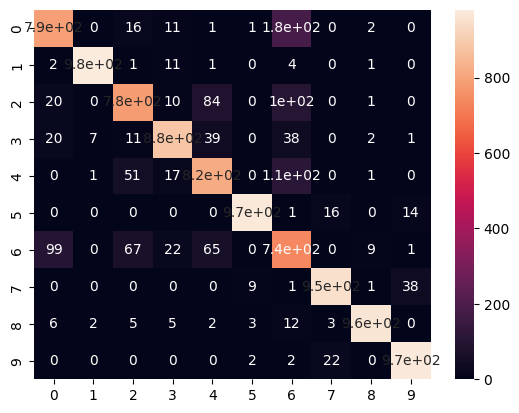

In [ ]:
test_labels = np.round(test_labels).astype(int)
y_pred=model.predict(test_images)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(test_labels, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
sns.heatmap(cm, annot=True)